In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
df = pd.read_csv('student_depression_dataset.csv')
df.replace('?', np.nan, inplace=True)
df = df.dropna(subset=['Depression'])

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

sleep_mapping = {
    'Less than 5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    'More than 8 hours': 3
}
df['Sleep Duration'] = df['Sleep Duration'].map(sleep_mapping)

label_cols = ['Gender', 'City', 'Profession', 'Study Satisfaction', 'Job Satisfaction',
              'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
              'Family History of Mental Illness', 'Depression']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

df['Sleep Duration'] = le.fit_transform(df['Sleep Duration'])

feature_cols = [col for col in df.columns if col != 'Depression']
X = df[feature_cols]
y = df['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79      2343
           1       0.85      0.86      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581

Confusion Matrix:
 [[1832  511]
 [ 441 2797]]


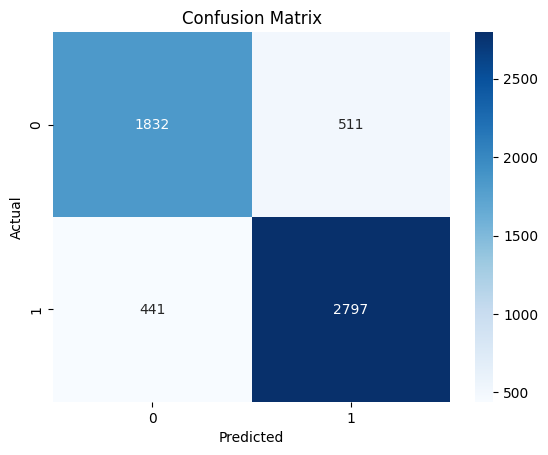

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [40]:
misclassified = X_test[y_test != y_pred]
misclassified['Actual'] = y_test[y_test != y_pred]
misclassified['Predicted'] = y_pred[y_test != y_pred]
print("\n5 Misclassified Samples:")
print(misclassified.head(5))


5 Misclassified Samples:
           id  Gender   Age  City  Profession  Academic Pressure  \
15759   79662       1  25.0    51          12                5.0   
26237  132248       0  24.0    50          12                2.0   
4140    20721       0  19.0    48          12                5.0   
27806  140153       0  30.0    37          12                3.0   
27362  137943       0  24.0    18          12                2.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
15759            0.0  7.87                   2                 0   
26237            0.0  7.08                   2                 0   
4140             0.0  7.24                   3                 0   
27806            0.0  9.04                   5                 0   
27362            0.0  8.08                   1                 0   

       Sleep Duration  Dietary Habits  Degree  \
15759               0               0       3   
26237               0               0       1   
4140     

<ipython-input-40-051c1bef0dd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified['Actual'] = y_test[y_test != y_pred]
<ipython-input-40-051c1bef0dd0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified['Predicted'] = y_pred[y_test != y_pred]
